In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import load_iris

# Introduction to machine learning with scikit-learn



## Table of Contents

1. [What is machine learning, and how does it work?](#what_is_ml)
  - [The major algorithms](#the_algorithms)
  - [Choosing the Right Algorithm](#choosing_the_right_algorithm)
 
2. [Validation and cross Validation](#validation_cross_validation)
  - [Splitting training data into test and split](#test_train_data)
  - manifold
  - two fold
  - five fold
  - oneout

3. [Clustering](#clustering)
  - Clustering Hand-Written Digits with the Gaussian mixture model (GMM)

<a id="clustering">Clustering</a>
<a id="document_classification">Document Classification</a>
<a id="feature_engineering">Feature Engineering</a>

4. [Applying the same techniques to audio]
* [First Practice with Generated .wav files](#practicing_with_generated_data)
  - [A Basic .wav file generation script](#wav_file_gen_script_basic)
  

5. Document Classification
* [Feature Engineering](#feature_engineering)


  [The author talking about digital signal processing)[https://www.youtube.com/watch?v=UOIllEyajGs)
  [The book online](https://greenteapress.com/wp/think-dsp/)
  


<a id='the_algorithms'></a>
<center><h2>The Algorithms</h2></center>

<!-- 


    1.1. Generalized Linear Models
        1.1.1. Ordinary Least Squares
            1.1.1.1. Ordinary Least Squares Complexity
        1.1.2. Ridge Regression
            1.1.2.1. Ridge Complexity
            1.1.2.2. Setting the regularization parameter: generalized Cross-Validation
        1.1.3. Lasso
            1.1.3.1. Setting regularization parameter
                1.1.3.1.1. Using cross-validation
                1.1.3.1.2. Information-criteria based model selection
                1.1.3.1.3. Comparison with the regularization parameter of SVM
        1.1.4. Multi-task Lasso
        1.1.5. Elastic-Net
        1.1.6. Multi-task Elastic-Net
        1.1.7. Least Angle Regression
        1.1.8. LARS Lasso
            1.1.8.1. Mathematical formulation
        1.1.9. Orthogonal Matching Pursuit (OMP)
        1.1.10. Bayesian Regression
            1.1.10.1. Bayesian Ridge Regression
            1.1.10.2. Automatic Relevance Determination - ARD
        1.1.11. Logistic regression
        1.1.12. Stochastic Gradient Descent - SGD
        1.1.13. Perceptron
        1.1.14. Passive Aggressive Algorithms
        1.1.15. Robustness regression: outliers and modeling errors
            1.1.15.1. Different scenario and useful concepts
            1.1.15.2. RANSAC: RANdom SAmple Consensus
                1.1.15.2.1. Details of the algorithm
            1.1.15.3. Theil-Sen estimator: generalized-median-based estimator
                1.1.15.3.1. Theoretical considerations
            1.1.15.4. Huber Regression
            1.1.15.5. Notes
        1.1.16. Polynomial regression: extending linear models with basis functions
    1.2. Linear and Quadratic Discriminant Analysis
        1.2.1. Dimensionality reduction using Linear Discriminant Analysis
        1.2.2. Mathematical formulation of the LDA and QDA classifiers
        1.2.3. Mathematical formulation of LDA dimensionality reduction
        1.2.4. Shrinkage
        1.2.5. Estimation algorithms
    1.3. Kernel ridge regression
    1.4. Support Vector Machines
        1.4.1. Classification
            1.4.1.1. Multi-class classification
            1.4.1.2. Scores and probabilities
            1.4.1.3. Unbalanced problems
        1.4.2. Regression
        1.4.3. Density estimation, novelty detection
        1.4.4. Complexity
        1.4.5. Tips on Practical Use
        1.4.6. Kernel functions
            1.4.6.1. Custom Kernels
                1.4.6.1.1. Using Python functions as kernels
                1.4.6.1.2. Using the Gram matrix
                1.4.6.1.3. Parameters of the RBF Kernel
        1.4.7. Mathematical formulation
            1.4.7.1. SVC
            1.4.7.2. NuSVC
            1.4.7.3. SVR
        1.4.8. Implementation details
    1.5. Stochastic Gradient Descent
        1.5.1. Classification
        1.5.2. Regression
        1.5.3. Stochastic Gradient Descent for sparse data
        1.5.4. Complexity
        1.5.5. Stopping criterion
        1.5.6. Tips on Practical Use
        1.5.7. Mathematical formulation
            1.5.7.1. SGD
        1.5.8. Implementation details
    1.6. Nearest Neighbors
        1.6.1. Unsupervised Nearest Neighbors
            1.6.1.1. Finding the Nearest Neighbors
            1.6.1.2. KDTree and BallTree Classes
        1.6.2. Nearest Neighbors Classification
        1.6.3. Nearest Neighbors Regression
        1.6.4. Nearest Neighbor Algorithms
            1.6.4.1. Brute Force
            1.6.4.2. K-D Tree
            1.6.4.3. Ball Tree
            1.6.4.4. Choice of Nearest Neighbors Algorithm
            1.6.4.5. Effect of leaf_size
        1.6.5. Nearest Centroid Classifier
            1.6.5.1. Nearest Shrunken Centroid
        1.6.6. Neighborhood Components Analysis
            1.6.6.1. Classification
            1.6.6.2. Dimensionality reduction
            1.6.6.3. Mathematical formulation
                1.6.6.3.1. Mahalanobis distance
            1.6.6.4. Implementation
            1.6.6.5. Complexity
                1.6.6.5.1. Training
                1.6.6.5.2. Transform
    1.7. Gaussian Processes
        1.7.1. Gaussian Process Regression (GPR)
        1.7.2. GPR examples
            1.7.2.1. GPR with noise-level estimation
            1.7.2.2. Comparison of GPR and Kernel Ridge Regression
            1.7.2.3. GPR on Mauna Loa CO2 data
        1.7.3. Gaussian Process Classification (GPC)
        1.7.4. GPC examples
            1.7.4.1. Probabilistic predictions with GPC
            1.7.4.2. Illustration of GPC on the XOR dataset
            1.7.4.3. Gaussian process classification (GPC) on iris dataset
        1.7.5. Kernels for Gaussian Processes
            1.7.5.1. Gaussian Process Kernel API
            1.7.5.2. Basic kernels
            1.7.5.3. Kernel operators
            1.7.5.4. Radial-basis function (RBF) kernel
            1.7.5.5. Matérn kernel
            1.7.5.6. Rational quadratic kernel
            1.7.5.7. Exp-Sine-Squared kernel
            1.7.5.8. Dot-Product kernel
            1.7.5.9. References
    1.8. Cross decomposition
    1.9. Naive Bayes
        1.9.1. Gaussian Naive Bayes
        1.9.2. Multinomial Naive Bayes
        1.9.3. Complement Naive Bayes
        1.9.4. Bernoulli Naive Bayes
        1.9.5. Out-of-core naive Bayes model fitting
    1.10. Decision Trees
        1.10.1. Classification
        1.10.2. Regression
        1.10.3. Multi-output problems
        1.10.4. Complexity
        1.10.5. Tips on practical use
        1.10.6. Tree algorithms: ID3, C4.5, C5.0 and CART
        1.10.7. Mathematical formulation
            1.10.7.1. Classification criteria
            1.10.7.2. Regression criteria
    1.11. Ensemble methods
        1.11.1. Bagging meta-estimator
        1.11.2. Forests of randomized trees
            1.11.2.1. Random Forests
            1.11.2.2. Extremely Randomized Trees
            1.11.2.3. Parameters
            1.11.2.4. Parallelization
            1.11.2.5. Feature importance evaluation
            1.11.2.6. Totally Random Trees Embedding
        1.11.3. AdaBoost
            1.11.3.1. Usage
        1.11.4. Gradient Tree Boosting
            1.11.4.1. Classification
            1.11.4.2. Regression
            1.11.4.3. Fitting additional weak-learners
            1.11.4.4. Controlling the tree size
            1.11.4.5. Mathematical formulation
                1.11.4.5.1. Loss Functions
            1.11.4.6. Regularization
                1.11.4.6.1. Shrinkage
                1.11.4.6.2. Subsampling
            1.11.4.7. Interpretation
                1.11.4.7.1. Feature importance
        1.11.5. Voting Classifier
            1.11.5.1. Majority Class Labels (Majority/Hard Voting)
                1.11.5.1.1. Usage
            1.11.5.2. Weighted Average Probabilities (Soft Voting)
            1.11.5.3. Using the VotingClassifier with GridSearchCV
                1.11.5.3.1. Usage
        1.11.6. Voting Regressor
    1.12. Multiclass and multilabel algorithms
        1.12.1. Multilabel classification format
        1.12.2. One-Vs-The-Rest
            1.12.2.1. Multiclass learning
            1.12.2.2. Multilabel learning
        1.12.3. One-Vs-One
            1.12.3.1. Multiclass learning
        1.12.4. Error-Correcting Output-Codes
            1.12.4.1. Multiclass learning
        1.12.5. Multioutput regression
        1.12.6. Multioutput classification
        1.12.7. Classifier Chain
        1.12.8. Regressor Chain
    1.13. Feature selection
        1.13.1. Removing features with low variance
        1.13.2. Univariate feature selection
        1.13.3. Recursive feature elimination
        1.13.4. Feature selection using SelectFromModel
            1.13.4.1. L1-based feature selection
            1.13.4.2. Tree-based feature selection
        1.13.5. Feature selection as part of a pipeline
    1.14. Semi-Supervised
        1.14.1. Label Propagation
    1.15. Isotonic regression
    1.16. Probability calibration
    1.17. Neural network models (supervised)
        1.17.1. Multi-layer Perceptron
        1.17.2. Classification
        1.17.3. Regression
        1.17.4. Regularization
        1.17.5. Algorithms
        1.17.6. Complexity
        1.17.7. Mathematical formulation
        1.17.8. Tips on Practical Use
        1.17.9. More control with warm_start

-->

<a id="choosing_the_right_algorithm"></a>
![scikit-learn algorithm map](static/img/sklearn_algorithms.png)

In [1]:
Supervised learning example: Iris classification

Let's take a look at another example of this process, using the Iris dataset we discussed earlier. Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution (see In Depth: Naive Bayes Classification for more details). Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. This could be done by hand, but it is more convenient to use the train_test_split utility function:
In [15]:

In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

NameError: name 'X_iris' is not defined

In [1]:
With the data arranged, we can follow our recipe to predict the labels:
In [16]:

In [1]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Finally, we can use the accuracy_score utility to see the fraction of predicted labels that match their true value:
In [17]:

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

Out[17]:

0.97368421052631582

With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!
Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA; see In Depth: Principal Component Analysis), which is a fast linear dimensionality reduction technique. We will ask the model to return two components—that is, a two-dimensional representation of the data.

Following the sequence of steps outlined earlier, we have:

NameError: name 'kneightbors' is not defined

In [6]:
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
Now lets fit the model
the wrong way

SyntaxError: invalid syntax (<ipython-input-7-6b7761002a1b>, line 1)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)



In [11]:
model.fit(X, y)
y_model = model.predict(X)




In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)



1.0

<a id="alidation_cross_validation"></a>
What why did we get a 1.0!?
That means perfect prediction!?!

Well, because we used the same data for training and testing so there was always an exact match



In [17]:

# This page is wrong https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb
# It changed
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)



0.9066666666666666


Model validation via cross-validation

One disadvantage of using a holdout 
set for model validation is that 
we have lost a portion of our 
data to the model training. 
In the above case, half the 
dataset does not contribute 
to the training of the model! 
This is not optimal, and can 
cause problems – especially 
if the initial set of training 
data is small.

One way to address this is to use 
cross-validation; that is, to do 
a sequence of fits where each subset 
of the data is used both as a training 
set and as a validation set. Visually, 
it might look something like this:

That's easy to fix, just do it twice 
split the dataset in half and alternate
train and test


Here we do two validation trials, alternately using each half of the data as a holdout set. Using the split data from before, we could implement it like this:

Now we have two separate scores

which we can combine by taking the mean (for example)

What comes out are two accuracy scores, which we could combine (by, say, taking the mean)

We can do even better (get a better measurement)by using more trials

to get a better measure of the global model performance. 

This particular form of 
cross-validation is a 
_two-fold_ cross-validation
—that is, one in which we 
have split the data into two sets 
and used each in turn as a validation set.

We could expand on this idea to use even 
more trials, and more folds in the data—for 
example, here is a visual depiction of 
five-fold cross-validation:


we could, for instance, split the data 
into five separate groups

4/5ths of the data is used to train 
and 1/5 is used to validate the model

And what do you know, scikit learn has 
convenience function called 
_cross_val_score_
for doing just that

In [21]:
#from sklearn.cross_validation import cross_val_score
#
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Repeating the validation across different 
subsets of the data gives us an even better
idea of the performance of the algorithm.

Scikit-Learn implements a number of useful 
cross-validation schemes that are useful in 
particular situations; these are implemented 
via iterators in the cross_validation module. 

For example, we might wish to go to the extreme 
case in which our number of folds is equal to the 
number of data points: that is, we train on all 
points but one in each trial. 

Provides train/test indices to split 
data in train/test sets. Each sample 
is used once as a test set (singleton) 
while the remaining samples form 
the training set.

This type of cross-validation is known as 
[leave-one-out](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)
cross validation, and can be used as follows:
_(Note that if you copy code from online such the code from the python data science handbook)_

In [14]:
# NOT THIS -> from sklearn.cross_validation import LeaveOneOut
from sklearn.model_selection import LeaveOneOut

# 
loo = LeaveOneOut()
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html
loo.get_n_splits(X)
scores = cross_val_score(model, X, y, cv=loo.split(X))
scores

NameError: name 'X' is not defined

---
## <a id="clustering">Clustering</a>

### Iris Clustering

### Handwritten Notes Clustering

### Audio Clustering
---


---
## <a id="feature_engineering">Feature Engineering</a>
### <a id="document_classification">Document Classification</a>

[Python for Data Science Ch 5.04](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.04-Feature-Engineering.ipynb)

In [22]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

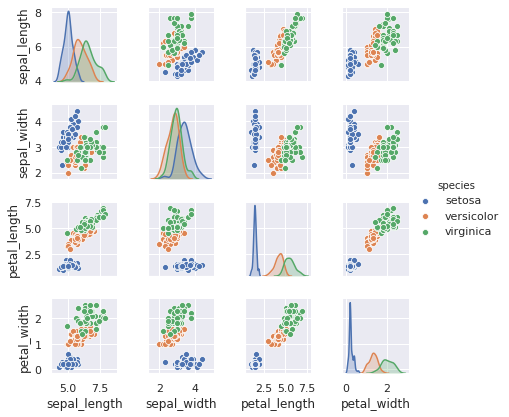

In [24]:
%matplotlib inline
import seaborn as sns; sns.set()
# The `size` parameter has been renamed to `height`; pleaes update your code.
sns.pairplot(iris, hue='species', height=1.5);

In [25]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

y_iris = iris['species']
y_iris.shape

(150,)

In [28]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

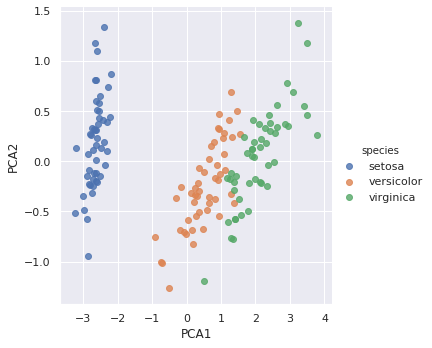

In [29]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

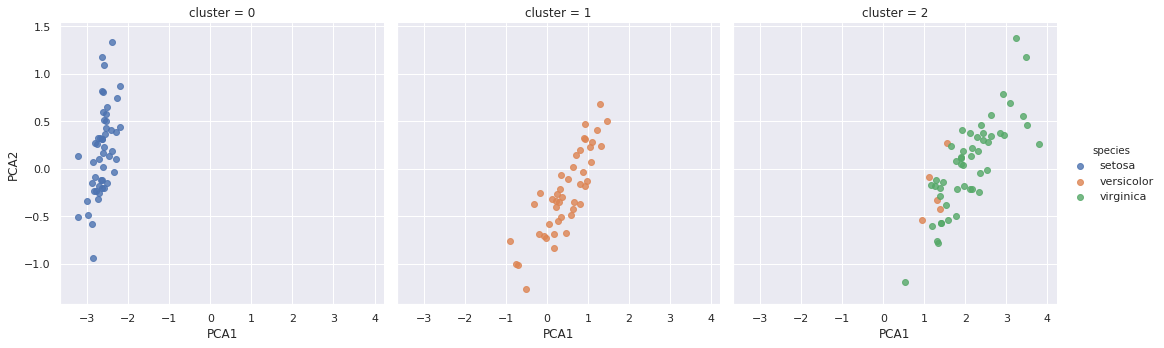

In [30]:
#from sklearn.mixture import GMM      # 1. Choose the model class
from sklearn.mixture import GaussianMixture as GMM      # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

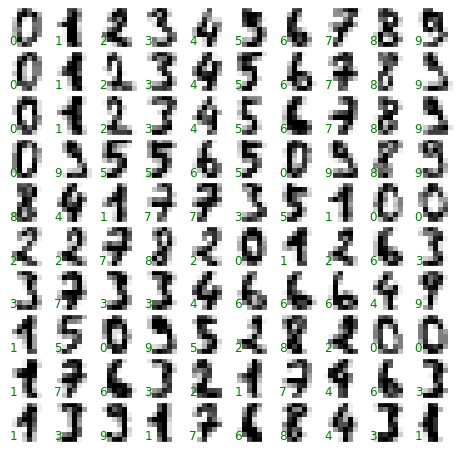

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')



In order to work with this data within Scikit-Learn, we need a two-dimensional, [n_samples, n_features] representation. We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the data and target attributes, respectively:


In [37]:
X = digits.data
X.shape

(1797, 64)

In [38]:
y = digits.target
y.shape

(1797,)

In [41]:


We see here that there are 
1,797 samples and 64 features.
Unsupervised learning: Dimensionality reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space. Instead we'll reduce the dimensions to 2, using an unsupervised method. Here, we'll make use of a manifold learning algorithm called Isomap (see In-Depth: Manifold Learning), and transform the data to two dimensions:


SyntaxError: invalid syntax (<ipython-input-41-b68e5026f121>, line 1)

In [43]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

We see that the projected data is now two-dimensional. Let's plot this data to see if we can learn anything from its structure:

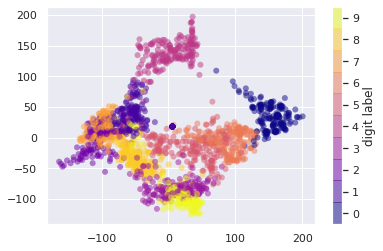

In [45]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('plasma', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

# ValueError: Colormap spectral is not recognized. 
# See: https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html



This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. For example, zeros (in black) and ones (in purple) have very little overlap in parameter space. Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle. On the other hand, there seems to be a more or less continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with "hats" on them, which cause them to look similar to fours.

Overall, however, the different groups appear to be fairly well separated in the parameter space: this tells us that even a very straightforward supervised classification algorithm should perform suitably on this data. Let's give it a try.
Classification on digits

Let's apply a classification algorithm to the digits. As with the Iris data previously, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:


In [47]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [49]:


from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)



In [50]:


from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)



0.8333333333333334

With even this extremely simple model, we find about 80% accuracy for classification of the digits! However, this single number doesn't tell us where we've gone wrong—one nice way to do this is to use the confusion matrix, which we can compute with Scikit-Learn and plot with Seaborn:


Text(89.18, 0.5, 'true value')

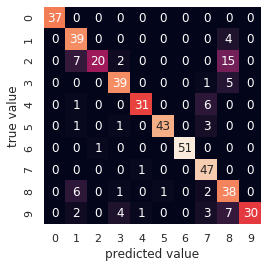

In [55]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [ ]:
This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights. Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We'll use green for correct labels, and red for incorrect labels:

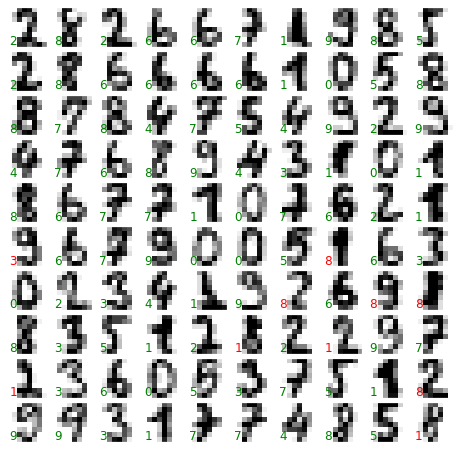

In [53]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

SyntaxError: invalid syntax (<ipython-input-56-133300eb16b8>, line 9)

In [ ]:


Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally. To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as support vector machines (see In-Depth: Support Vector Machines), random forests (see In-Depth: Decision Trees and Random Forests) or another classification approach.
Summary

In this section we have covered the essential features of the Scikit-Learn data representation, and the estimator API. Regardless of the type of estimator, the same import/instantiate/fit/predict pattern holds. Armed with this information about the estimator API, you can explore the Scikit-Learn documentation and begin trying out various models on your data.

In the next section, we will explore perhaps the most important topic in machine learning: how to select and validate your model.


---
## Applying the Hand-Written Numbers Principles to Audio

- Requirements
  * The sounddevice Module
  ```sh
  conda install -c conda-forge python-sounddevice
  ```

(1797, 2)

In [8]:
import numpy as np
from scipy.io.wavfile import write

# Samples per second
sps = 44100

# Frequency / pitch of the sine wave
freq_hz = 440.0

# Duration
duration_s = 5.0

# NumpPy magic
each_sample_number = np.arange(duration_s * sps)
waveform = np.sin(2 * np.pi * each_sample_number * freq_hz / sps)
waveform_quiet = waveform * 0.3
waveform_integers = np.int16(waveform_quiet * 32767)


write('first_sine_wave.wav', sps, waveform_integers)

In [13]:
import time
import sounddevice as sd


# Samples per second
sps = 44100

# Frequency / pitch
freq_hz = 440.0

# Duration
duration_s = 5.0

# Attenuation so the sound is reasonableWAV FILE
atten = 0.3


# NumpPy magic to calculate the waveform
each_sample_number = np.arange(duration_s * sps)
waveform = np.sin(2 * np.pi * each_sample_number * freq_hz / sps)
waveform_quiet = waveform * atten

# Play the waveform out the speakers
sd.play(waveform_quiet, sps)
time.sleep(duration_s)
sd.stop()

In [63]:
import time
import sounddevice as sd


class Audio_array(object):

    def __init__(self, sps, freq_hz, dur_s, atten=3.0):
        self.sps = sps
        self.freq_hz = freq_hz
        self.dur_s = dur_s
        self.attenuation = atten
        self.waveform = self.generate_waveform_array()
        
    def generate_waveform_array(self):
        # NumpPy magic to calculate the waveform
        each_sample_number = np.arange(self.dur_s * self.sps)
        waveform = np.sin(2 * np.pi * each_sample_number * self.freq_hz / self.sps)
        return waveform * self.attenuation

    def play(self):
        # Play the waveform out the speakers
        sd.play(self.waveform, sps)
        time.sleep(self.dur_s)
        sd.stop()
        
        
# Define some samples
sps = 44100 # Samples per second
freq_hz = 440.0 # Frequency / pitch
duration_s = 5.0 # Duration in seconds
atten = 0.3 # Attenuation


aarr = Audio_array(sps, freq_hz, duration_s, atten)
aarr.play()

In [63]:
aarr.waveform.shape

In [65]:
aarr.waveform.dtype

In [72]:
dir(aarr.waveform)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [76]:
aarr.waveform.itemsize


8

In [78]:
aarr.waveform.nbytes

1764000

In [81]:
from sys import getsizeof
getsizeof(aarr.waveform)

1764096

### Reading A WAV File

In [37]:
from scipy.io import wavfile

rate, af = wavfile.read("./data/audio/militia.wav")

In [ ]:
# Play the waveform out the speakers
sd.play(af, rate)
seconds = len(af) / rate
print(seconds)
time.sleep(len(af) / rate)
sd.stop()

In [10]:
! ls

02_sklearn_algorithms.png  first_sine_wave.wav	olmain.ipynb
data			   literature		output.png
data_schooreference	   main.ipynb		static


---
<a id="supplementary_material"><center><h1>Supplementary Material</h1></a><center>

In [9]:
from IPython.display import FileLink, FileLinks
FileLink('./literature/thinkdsp/thinkdsp.pdf')

/home/patrickm/ml-sklearn-demo/literature/thinkdsp/thinkdsp.pdf

[ThinkDSP Book](./literature/thinkdsp/thinkdsp.pdf)

#### The sounddevice module


[Docs](http://python-sounddevice.readthedocs.io/en/0.3.10/)

#### Youtube Downloader (youtube-dl)

[Source Code](https://github.com/ytdl-org/youtube-dl)

In [12]:
https://github.com/ytdl-org/youtube-dl

SyntaxError: invalid syntax (<ipython-input-12-9f17f741b658>, line 1)

In [16]:
<a id="index"><h1>Index</h1></a>

<a id="
get_n_splits(self, X, y=None, groups=None)[source]

    Returns the number of splitting iterations in the cross-validator
    Parameters:	

    X : array-like, shape (n_samples, n_features)

        Training data, where n_samples is the number of samples and n_features is the number of features.
    y : object

        Always ignored, exists for compatibility.
    groups : object

        Always ignored, exists for compatibility.

    Returns:	

    n_splits : int

        Returns the number of splitting iterations in the cross-validator.

<a id="
split(self, X, y=None, groups=None)[source]

    Generate indices to split data into training and test set.
    Parameters:	

    X : array-like, shape (n_samples, n_features)

        Training data, where n_samples is the number of samples and n_features is the number of features.
    y : array-like, of length n_samples

        The target variable for supervised learning problems.
    groups : array-like, with shape (n_samples,), optional

        Group labels for the samples used while splitting the dataset into train/test set.

    Yields:	

    train : ndarray

        The training set indices for that split.
    test : ndarray

        The testing set indices for that split.


SyntaxError: invalid syntax (<ipython-input-16-4c39a8f405c3>, line 1)